<a href="https://colab.research.google.com/github/FS-Tamim/City-Life-Cycle-Open-GL-project/blob/main/B_92_cm_4thprecision_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
! pip install -q transformers
!pip install -q gradio
!sudo apt-get install git-lfs
!git lfs install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:

**IMPORTING LIBRARIES**

In [3]:
import os
# import wandb
import torch
import pickle
import numpy as np
%matplotlib inline
import pandas as pd
import gradio as gr
import seaborn as sns
import tensorflow as tf
from typing import Dict
from ast import literal_eval
from torch.optim import AdamW
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
# from kaggle_secrets import UserSecretsClient
from torch.nn import BCEWithLogitsLoss, BCELoss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
# from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
from transformers import XLNetForSequenceClassification, XLNetTokenizer,BertForSequenceClassification,BertTokenizer, RobertaForSequenceClassification,RobertaTokenizer

# pd.set_option('Display.max_colwidth',None)

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
torch.__version__

'2.0.0+cu118'

In [6]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

**Reading  Dataset**

In [8]:
dataset_Name='/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/Hostility_dataset - Hostility_Dataset_main_suffeld.csv'
df = pd.read_csv(dataset_Name)

df=df.dropna()
df.head()


,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এটাই তো এখনার জুগের মেয়েরা বুঝে না যে তাদের ...,1,1,1,0,0,0
1,10492,: একটা দেশের মন্ত্রী কতো টা নির্লজ্জ হলে এমন ...,0,0,0,0,0,0
2,7219,"আজকের এই পবিত্র দিনে তোরে গালি দিলাম না , ঈদট...",1,1,0,0,0,1
3,10353,আজব একটা মানুষ তুমি ! দুঃখের গল্প বললেও তুমি ...,0,0,0,0,0,0
4,9216,আপনাকে সামনে থেকে দেখলে একটু সালাম করতাম,0,0,0,0,0,0


In [9]:
df.isnull().values.any()

False

In [10]:
print("Total number of Articles extracted from dataset are =",len(df))

Total number of Articles extracted from dataset are = 10535


In [11]:
print('Average Article length: ', df.Text.str.split().str.len().mean())
print('Stdev Article length: ', df.Text.str.split().str.len().std())

Average Article length:  13.081822496440436
Stdev Article length:  12.066305758990934


In [12]:
cols = df.columns
cols = list(df.columns)
mesh_Heading_categories = cols[2:3]
num_labels = len(mesh_Heading_categories)
print('Mesh Labels Root Class: "\n"',mesh_Heading_categories)
print("\n")
print('Number of Labels: ' ,num_labels)


Mesh Labels Root Class: "
" ['Hostile/Non-Hostile']


Number of Labels:  1


**Text Preprocessing**

In [13]:
stp_path = '/content/drive/MyDrive/Colab Notebooks/Hostalisty detection system/bd_stopword.txt'
stp = open(stp_path,'r',encoding='utf-8').read().split()

In [14]:
'''
Text Cleaning
'''
from bs4 import BeautifulSoup
import re,nltk,json
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  # post = re.sub(r'[^\x00-\x7F]+|[\W]', '', text)
  post = post.replace('—', ' ') 
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # # Stopword 
  result = text.split()
  text = [word.strip() for word in result if word not in stp ]
  text =" ".join(text)
  
  return text

In [15]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [16]:
#Removing punctuations

df['Text'] = df['Text'].apply(remove_emojis)
df['Text'] = df['Text'].apply(text_cleaning)

# ## Data samples after cleaning
# print("Data samples after cleaning:\n")
# for i in range(100):
#   print("Original Data:===\n",df.Text[i],"\nCleaned Data:===\n",df.cleaned[i],)

In [17]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())

labels = ['Hostile/Non-Hostile']
# Count number of unique words in each set
def dataset_statistics(dataset):
    for l in labels:
        word_list = [word.strip() for t in list(dataset.loc[dataset[l] == 1, 'Text']) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
            counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        print(f"\nClass Name:--> {l} ") 
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Maximum Caption length: {}".format(max(dataset.loc[dataset[l] == 1, 'Text'].apply(char_length))))
        print("Minimum Caption length: {}".format(min(dataset.loc[dataset[l] == 1, 'Text'].apply(char_length))))
        print("Average Words in texts: {}".format(np.mean(dataset.loc[dataset[l] == 1, 'Text'].apply(char_length))))
        print(color.BOLD+"\nMost Frequent Words:\n"+color.END)
        for k,v in ordered[:100]:
            print("{}".format(k))


In [18]:
dataset_statistics(df)


Class Name:--> Hostile/Non-Hostile 
Number of Words:69167
Number of Unique Words:18801
Maximum Caption length: 232
Minimum Caption length: 0
Average Words in texts: 9.222266666666666

Most Frequent Words:

কথা
বাচ্চা
মানুষ
সাথে
মনে
ভারত
খানকির
চাই
ভালো
ভারতের
পোলা
ভাই
দরকার
বিচার
দেশের
দেশ
কুত্তার
মত
দেশে
মাগি
পুলিশ
বাংলাদেশ
বাংলাদেশের
এসব
শালা
সরকার
দিন
মাগির
টা
সবাই
ধর্ম
ফাঁসি
মা
লীগ
বড়
খানকি
কাজ
খারাপ
দিয়া
হাসিনা
ভিডিও
মুসলিম
সময়
সালা
বেশি
ভারতে
তোরা
টাকা
বাংলাদেশে
ফাসি
জুতা
কাদের
শেখ
ইসলাম
মেয়ে
মাদারচোদ
লোক
হিন্দু
মারা
আল্লাহ
হয়
আওয়ামী
ছেলে
সামনে
মানুষের
রে
দালাল
লাগে
ছি
লজ্জা
ভাল
শেষ
ডিসি
একজন
চোর
দোষ
দেয়া
দের
উচিৎ
হত্যা
মার
হয়ে
পাগল
এতো
নাম
তোরে
বাল
ভোট
মেরে
কোথায়
চুদি
আওয়ামীলীগ
দুই
সরকারের
থাকলে
ছিলো
দিয়ে
নষ্ট
মারে
কিভাবে


In [19]:
df

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
0,5515,এখনার জুগের মেয়েরা বুঝে সাধিনতার নাম লোভ দেখিয়...,1,1,1,0,0,0
1,10492,দেশের মন্ত্রী কতো টা নির্লজ্জ হেসে হেসে উত্তর ...,0,0,0,0,0,0
2,7219,আজকের পবিত্র দিনে তোরে গালি দিলাম ঈদটা যাক তরে...,1,1,0,0,0,1
3,10353,আজব মানুষ দুঃখের গল্প বললেও কষ্ট পাও সুখের গল্...,0,0,0,0,0,0
4,9216,আপনাকে সামনে দেখলে একটু সালাম করতাম,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10530,10121,হ্যাপি জদি রাজি বিয়া রাজি আছি প্লিজ বেন,0,0,0,0,0,0
10531,4641,হ্যেকার গ্রুপ মায়্রপ চুদতে চাইসিলো,1,1,0,0,1,0
10532,7444,হ্লাত প্রতিবন্ধী ওরে সামুচ গু দে,1,1,0,0,0,1
10533,7495,হ্লাপুত দুইটা হোগা ম্রা কোটায় পাইছত,1,1,0,0,0,1


In [20]:
df_train, df_test = train_test_split(df, random_state=32, test_size=0.10, shuffle=True)

print(df_train.shape)
print(df_test.shape)
df_test

(9481, 8)
(1054, 8)


,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
4327,755,খাটে ঘুমানোর সময় মজা দুই জনই পাইছে,1,1,0,0,0,0
10478,6795,হুম পৃথিবীতে এখনো ধর্ষন তোর ভারতেই ধর্মবিরো...,1,0,0,0,0,1
1591,8018,আলহামদুলিল্লাহ আললাহ একমাত্র বাচানের মালিক সুস...,0,0,0,0,0,0
3164,6381,সেনা চাই পাকিস্তানকে চুদে দেবে,1,0,1,0,0,0
7238,6111,বাকশালের একাল সেকাল শিরোনামে এপিসোড চাই খালিদ,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1198,504,ডাইনি বুবুজান,1,0,1,0,0,0
3845,2798,কারে চুইদা মাতাল হইছেআরে বোকাচুদি ঢাবির ভিপিরে...,1,1,0,0,0,0
2205,8931,প্রথম বাংলা সিনেমা গিয়ে ইচ্ছা,0,0,0,0,0,0
9008,6217,রব্বানী সময়ে সারা বি এনপি আওয়ামীলীগ মিলেও পারেনি,1,0,1,1,0,0


In [21]:
df_train['one_hot_labels'] = list(df_train[mesh_Heading_categories].values)
df_train.head(3)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
5731,5513,মরোশ কেনো খানকি,1,1,1,0,0,0,[1]
4011,4121,কুক,1,1,0,0,0,1,[1]
5920,7872,ভিডিও গুলো দেখি সবচেয়ে অন্যতম সুন্দর ভিডিও ভাল...,0,0,0,0,0,0,[0]


In [22]:
labels = list(df_train.one_hot_labels.values)
Article_train = list(df_train.Text.values)

**Model-1 Tokenizations**

In [23]:
%%time
from transformers import AutoTokenizer
max_length = 128
model_name='neuralspace-reverie/indic-transformers-bn-distilbert'
# model_name = 'sagorsarker/bangla-bert-base'
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())
input_ids = encodings['input_ids'] # tokenized and encoded sentences
attention_masks = encodings['attention_mask'] # attention masks


tokenizer outputs:  dict_keys(['input_ids', 'attention_mask'])
CPU times: user 1.55 s, sys: 132 ms, total: 1.69 s
Wall time: 2.57 s


In [24]:
# Identifying indices of 'one_hot_labels' entries that only occur once - this will allow me to stratify split our training data later
label_counts = df_train.one_hot_labels.astype(str).value_counts()
print(label_counts)
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)
print('df label indices with only one instance: ', one_freq)

[1]    6734
[0]    2747
Name: one_hot_labels, dtype: int64
df label indices with only one instance:  Index([], dtype='object')


In [25]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=2020, test_size=0.10)

# Convert all of our data into torch tensors, the required datatype for our BERT Pytorch model
train_inputs = torch.IntTensor(train_inputs)
train_labels = torch.IntTensor(train_labels)
train_masks = torch.LongTensor(train_masks)

validation_inputs = torch.IntTensor(validation_inputs)
validation_labels = torch.IntTensor(validation_labels)
validation_masks = torch.IntTensor(validation_masks)
print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)

print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)

torch.Size([8532, 128])
torch.Size([8532, 1])
torch.Size([8532, 128])
torch.Size([949, 128])
torch.Size([949, 1])
torch.Size([949, 128])


<ipython-input-25-d9266df52b22>:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  train_labels = torch.IntTensor(train_labels)


**Model-1 Creating the Data Loaders**

In [26]:
batch_size = 64

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data =     TensorDataset(train_inputs, train_masks, train_labels,)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [27]:
torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

**model-1 Loading the pretrained model**

In [28]:
%%time

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.cuda()
print('Model Pushed to Cuda for Training')

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at neuralspace-reverie/indic-transformers-bn-distilbert were not used when initializing BertForSequenceClassification: ['distilbert.transformer.layer.5.attention.k_lin.weight', 'distilbert.transformer.layer.5.sa_layer_norm.bias', 'distilbert.transformer.layer.0.sa_layer_norm.bias', 'distilbert.embeddings.LayerNorm.bias', 'distilbert.transformer.layer.2.sa_layer_norm.bias', 'distilbert.transformer.layer.1.attention.v_lin.weight', 'distilbert.transformer.layer.5.ffn.lin2.bias', 'distilbert.transformer.layer.5.attention.k_lin.bias', 'distilbert.transformer.layer.5.attention.out_lin.bias', 'distilbert.transformer.layer.3.attention.q_lin.bias', 'distilbert.transformer.layer.5.attention.v_lin.weight', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.5.ffn.lin2.weight', 'distilbert.transformer.layer.4.attention.k_lin.weight', 'distilbert.transformer.layer.3.ffn.lin2.bias', 'distilbert.transformer.layer.5.attention.q_li

Model Pushed to Cuda for Training
CPU times: user 3.09 s, sys: 818 ms, total: 3.91 s
Wall time: 11.7 s


In [29]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [30]:
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)
# optimizer = AdamW(model.parameters(),lr=4e-5)  # Default optimization #XL-NET

In [31]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

**Model-1 Training the model**

In [32]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [33]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [34]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=e9757065b28995d81dfd497480e3a2e87858af10b5a2587e88902dc575ddb97c
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [35]:
import wandb
wandb.login()
#copy and past the below api key
# 2ce8199bde0a38e5202e8683a3bb655643b68986

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [36]:
wandb.init(project='project_name', entity='fstamim9')
# For Storing our loss and accuracy for plotting
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

# Number of training epochs (Orignal author's recommend between 10 and 20)
epochs = 10


# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch "):
    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Tracking variables
    tr_loss = 0 #running loss
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels= batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss() 
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    

        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # scheduler.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)

    ###############################################################################

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Variables to gather full output
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

    # Predict
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            # Forward pass
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

    # Flatten outputs
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate Accuracy
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    
    wandb.log({"train_loss":tr_loss/nb_tr_steps,"val_f1_accuracy":val_f1_accuracy,"val_flat_accuracy":val_flat_accuracy,})
wandb.finish()

wandb: Currently logged in as: fstamim9. Use `wandb login --relogin` to force relogin


Epoch :   0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 0.5943683864020589


Epoch :  10%|█         | 1/10 [02:55<26:15, 175.02s/it]

F1 Validation Accuracy:  66.0377358490566
Flat Validation Accuracy:  66.0377358490566


Train loss: 0.5086214815947547


Epoch :  20%|██        | 2/10 [05:54<23:39, 177.45s/it]

F1 Validation Accuracy:  66.0377358490566
Flat Validation Accuracy:  66.0377358490566


Train loss: 0.41407588891573804


Epoch :  30%|███       | 3/10 [08:53<20:47, 178.18s/it]

F1 Validation Accuracy:  69.81132075471697
Flat Validation Accuracy:  69.81132075471697


Train loss: 0.362082646186672


Epoch :  40%|████      | 4/10 [11:51<17:49, 178.33s/it]

F1 Validation Accuracy:  71.69811320754717
Flat Validation Accuracy:  71.69811320754717


Train loss: 0.3238035603356895


Epoch :  50%|█████     | 5/10 [14:50<14:52, 178.55s/it]

F1 Validation Accuracy:  71.69811320754717
Flat Validation Accuracy:  71.69811320754717


Train loss: 0.3102383701992569


Epoch :  60%|██████    | 6/10 [17:49<11:53, 178.48s/it]

F1 Validation Accuracy:  75.47169811320754
Flat Validation Accuracy:  75.47169811320755


Train loss: 0.2663266182279409


Epoch :  70%|███████   | 7/10 [20:47<08:55, 178.54s/it]

F1 Validation Accuracy:  73.58490566037736
Flat Validation Accuracy:  73.58490566037736


Train loss: 0.25372905317527145


Epoch :  80%|████████  | 8/10 [23:46<05:57, 178.67s/it]

F1 Validation Accuracy:  75.47169811320754
Flat Validation Accuracy:  75.47169811320755


Train loss: 0.2410781466916426


Epoch :  90%|█████████ | 9/10 [26:44<02:58, 178.51s/it]

F1 Validation Accuracy:  75.47169811320754
Flat Validation Accuracy:  75.47169811320755


Train loss: 0.22146147823155815


Epoch : 100%|██████████| 10/10 [29:43<00:00, 178.38s/it]

F1 Validation Accuracy:  81.13207547169812
Flat Validation Accuracy:  81.13207547169812




train_loss,█▆▅▄▃▃▂▂▁▁
val_f1_accuracy,▁▁▃▄▄▅▅▅▅█
val_flat_accuracy,▁▁▃▄▄▅▅▅▅█
train_loss,0.22146
val_f1_accuracy,81.13208
val_flat_accuracy,81.13208


In [37]:
num_epochs = np.arange(1,len(training_loss_list)+1)
df_train_results=pd.DataFrame({'Epochs':num_epochs,'F1 Validation Accuracy':val_f1_accuracy_list,\
                               'Flat Validation Accuracy':val_flat_accuracy_list,'Train loss':training_loss_list})

<a id="8"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Visualizing The results</p>

#### [Top ↑](#top)

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for Bert-Base')

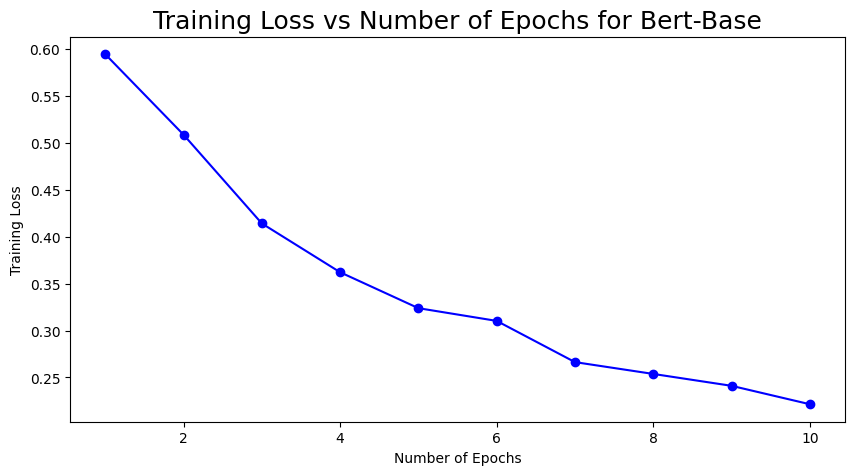

In [38]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for Bert-Base",fontsize=18)

(0.0, 100.0)

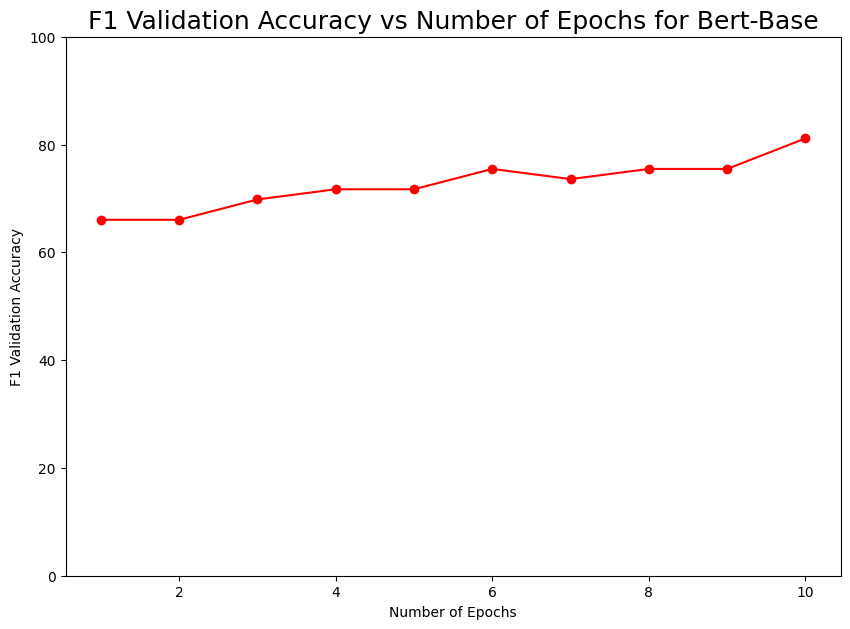

In [39]:
fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

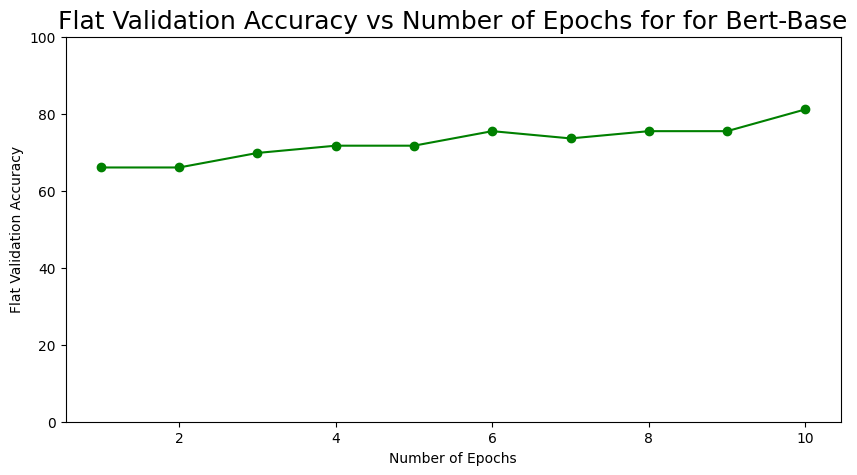

In [40]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [41]:
df_test

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm
4327,755,খাটে ঘুমানোর সময় মজা দুই জনই পাইছে,1,1,0,0,0,0
10478,6795,হুম পৃথিবীতে এখনো ধর্ষন তোর ভারতেই ধর্মবিরো...,1,0,0,0,0,1
1591,8018,আলহামদুলিল্লাহ আললাহ একমাত্র বাচানের মালিক সুস...,0,0,0,0,0,0
3164,6381,সেনা চাই পাকিস্তানকে চুদে দেবে,1,0,1,0,0,0
7238,6111,বাকশালের একাল সেকাল শিরোনামে এপিসোড চাই খালিদ,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
1198,504,ডাইনি বুবুজান,1,0,1,0,0,0
3845,2798,কারে চুইদা মাতাল হইছেআরে বোকাচুদি ঢাবির ভিপিরে...,1,1,0,0,0,0
2205,8931,প্রথম বাংলা সিনেমা গিয়ে ইচ্ছা,0,0,0,0,0,0
9008,6217,রব্বানী সময়ে সারা বি এনপি আওয়ামীলীগ মিলেও পারেনি,1,0,1,1,0,0


In [42]:
df_test['one_hot_labels'] = list(df_test[mesh_Heading_categories].values)
df_test.head(10)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
4327,755,খাটে ঘুমানোর সময় মজা দুই জনই পাইছে,1,1,0,0,0,0,[1]
10478,6795,হুম পৃথিবীতে এখনো ধর্ষন তোর ভারতেই ধর্মবিরো...,1,0,0,0,0,1,[1]
1591,8018,আলহামদুলিল্লাহ আললাহ একমাত্র বাচানের মালিক সুস...,0,0,0,0,0,0,[0]
3164,6381,সেনা চাই পাকিস্তানকে চুদে দেবে,1,0,1,0,0,0,[1]
7238,6111,বাকশালের একাল সেকাল শিরোনামে এপিসোড চাই খালিদ,1,1,0,0,1,0,[1]
4258,5925,সন্দেহ খুনে মিন্নি অবশ্যই জড়িত রিমান্ডে নিলেই ...,1,0,1,0,0,0,[1]
4772,9598,ঘর পরিস্কার,0,0,0,0,0,0,[0]
6479,10296,নতুন পরিচালকের নতুন প্রচেষ্টা উড়নচন্ডী মুক্তি...,0,0,0,0,0,0,[0]
6221,10148,দুই মিনিট ঘন্টা হত🤣🤣🤣🤣,0,0,0,0,0,0,[0]
2735,1013,পুলিশি রাষ্ট্রে সর্ব সাধারণ জনগন আমারা মুক্তি চাই,1,0,1,0,1,0,[1]


In [43]:
test_labels = list(df_test.one_hot_labels.values)
Articles_test = list(df_test.Text.values)
test_mesh_categories = list(df_test.columns[2:3])

In [44]:
# Encoding input data
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)
test_input_ids = test_encodings['input_ids']
test_attention_masks = test_encodings['attention_mask']

In [45]:
# Make tensors out of data
test_inputs = torch.IntTensor(test_input_ids)
test_labels = torch.IntTensor(test_labels)
test_masks = torch.IntTensor(test_attention_masks)
# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels,)# test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

**Model-1 Evaluating the model** 

In [46]:
%%time

# Test

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

CPU times: user 8.02 s, sys: 9.03 ms, total: 8.03 s
Wall time: 8.02 s


In [47]:
print(true_bools)


[array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([False]), array([False]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([False]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([False]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([False]), array([ True]), array([ True]), array([False]), array([ True]), array([False]), array([False]), array([False]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([

In [48]:
print(pred_bools)

[array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([False]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([ True]), array([ True]), array([ True]), array([ True]), array([ True]), array([False]), array([False]), array([ True]), array([ True])]


**model-1 Classification Report**


In [49]:
pred_bools = [pl>0.50 for pl in pred_labels] #boolean output after thresholding
# Print and save classification report
test_mesh_categories=['non-hostile','hostile']
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

df_test_result=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)
df_report=pd.DataFrame(clf_report).transpose()



Test F1 Accuracy:  0.8415559772296015
Test Flat Accuracy:  0.8415559772296015 

              precision    recall  f1-score   support

 non-hostile       0.72      0.68      0.70       288
     hostile       0.88      0.90      0.89       766

    accuracy                           0.84      1054
   macro avg       0.80      0.79      0.80      1054
weighted avg       0.84      0.84      0.84      1054



In [50]:
model1_f1=Test_F1_Accuracy
model1_pred=pred_labels
print(model1_f1)
print(model1_pred)

0.8415559772296015
[array([0.6338611], dtype=float32), array([0.99638474], dtype=float32), array([0.01646945], dtype=float32), array([0.993515], dtype=float32), array([0.6502925], dtype=float32), array([0.86784637], dtype=float32), array([0.18292698], dtype=float32), array([0.533325], dtype=float32), array([0.9941288], dtype=float32), array([0.9965849], dtype=float32), array([0.9922511], dtype=float32), array([0.99755305], dtype=float32), array([0.9958118], dtype=float32), array([0.1057654], dtype=float32), array([0.9959794], dtype=float32), array([0.9485841], dtype=float32), array([0.99802774], dtype=float32), array([0.97951496], dtype=float32), array([0.9979511], dtype=float32), array([0.99742293], dtype=float32), array([0.5841088], dtype=float32), array([0.9067239], dtype=float32), array([0.99472827], dtype=float32), array([0.9980233], dtype=float32), array([0.9978204], dtype=float32), array([0.04278033], dtype=float32), array([0.99363], dtype=float32), array([0.9938605], dtype=floa

In [51]:
df_report.to_csv('Classification_Report.csv',index=False)

In [52]:
model.save_pretrained('./Multi_label_Classification_Save/')
tokenizer.save_pretrained('./Multi_label_Classification_Save/')

('./Multi_label_Classification_Save/tokenizer_config.json',
 './Multi_label_Classification_Save/special_tokens_map.json',
 './Multi_label_Classification_Save/vocab.txt',
 './Multi_label_Classification_Save/added_tokens.json',
 './Multi_label_Classification_Save/tokenizer.json')

<a id="4"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model 2</p>
#### [Top ↑](#top)

<a id="4"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model-2 Tokenizations</p>
#### [Top ↑](#top)

In [53]:
%%time
from transformers import AutoTokenizer
max_length = 128
#tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base', do_lower_case=False)  # tokenizer
model_name = 'bert-base-multilingual-cased'
# tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True) 
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
#tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False) 

encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
attention_masks = encodings['attention_mask'] # attention masks


tokenizer outputs:  dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
CPU times: user 1.7 s, sys: 149 ms, total: 1.85 s
Wall time: 2.07 s


In [54]:
# Identifying indices of 'one_hot_labels' entries that only occur once - this will allow me to stratify split our training data later
label_counts = df_train.one_hot_labels.astype(str).value_counts()
print(label_counts)
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)
print('df label indices with only one instance: ', one_freq)

[1]    6734
[0]    2747
Name: one_hot_labels, dtype: int64
df label indices with only one instance:  Index([], dtype='object')


In [55]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=2020, test_size=0.20)

# Convert all of our data into torch tensors, the required datatype for our BERT Pytorch model
train_inputs = torch.IntTensor(train_inputs)
train_labels = torch.IntTensor(train_labels)
train_masks = torch.LongTensor(train_masks)

validation_inputs = torch.IntTensor(validation_inputs)
validation_labels = torch.IntTensor(validation_labels)
validation_masks = torch.IntTensor(validation_masks)
print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)

print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)

torch.Size([7584, 128])
torch.Size([7584, 1])
torch.Size([7584, 128])
torch.Size([1897, 128])
torch.Size([1897, 1])
torch.Size([1897, 128])


<a id="5"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model-2 Creating the Data Loaders</p>
#### [Top ↑](#top)

In [56]:
batch_size = 64

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data =     TensorDataset(train_inputs, train_masks, train_labels,)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [57]:
torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

<a id="6"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model-2 Loading the pretrained model</p>
#### [Top ↑](#top)

In [58]:
%%time
#Tried Several Models Locally XLNet was performing Best. Note If you are changing the model then change the Tokenizer also
# model = RobertaForSequenceClassification.from_pretrained('distilroberta-base', num_labels=num_labels)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
# model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=num_labels)
model.cuda()
print('Model Pushed to Cuda for Training')

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Model Pushed to Cuda for Training
CPU times: user 3.44 s, sys: 1.82 s, total: 5.26 s
Wall time: 11.5 s


In [59]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [60]:
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)
# optimizer = AdamW(model.parameters(),lr=4e-5)  # Default optimization #XL-NET

In [61]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

<a id="7"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Model-2 Training the model</p>
#### [Top ↑](#top)

In [62]:
wandb.init(project='project_name', entity='fstamim9')
# For Storing our loss and accuracy for plotting
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

# Number of training epochs (Orignal author's recommend between 10 and 20)
epochs = 8

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch "):
    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Tracking variables
    tr_loss = 0 #running loss
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels= batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()

        # Forward pass for multilabel classification
        # https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
        # Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities
        # Also This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable 
        # than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the 
        # log-sum-exp trick for numerical stability.
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss() 
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    

        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # scheduler.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)

    ###############################################################################

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Variables to gather full output
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

    # Predict
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            # Forward pass
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

    # Flatten outputs
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate Accuracy
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    
    wandb.log({"train_loss":tr_loss/nb_tr_steps,"val_f1_accuracy":val_f1_accuracy,"val_flat_accuracy":val_flat_accuracy,})
wandb.finish()

Epoch :   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.47857923542751984


Epoch :  12%|█▎        | 1/8 [02:51<20:03, 171.99s/it]

F1 Validation Accuracy:  95.1219512195122
Flat Validation Accuracy:  95.1219512195122


Train loss: 0.3085317167163897


Epoch :  25%|██▌       | 2/8 [05:43<17:09, 171.57s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.24632434659645336


Epoch :  38%|███▊      | 3/8 [08:34<14:18, 171.61s/it]

F1 Validation Accuracy:  95.1219512195122
Flat Validation Accuracy:  95.1219512195122


Train loss: 0.20926073556687652


Epoch :  50%|█████     | 4/8 [11:26<11:26, 171.62s/it]

F1 Validation Accuracy:  95.1219512195122
Flat Validation Accuracy:  95.1219512195122


Train loss: 0.17467467083024377


Epoch :  62%|██████▎   | 5/8 [14:18<08:34, 171.58s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.15093500758795178


Epoch :  75%|███████▌  | 6/8 [17:09<05:43, 171.65s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.11748469331372186


Epoch :  88%|████████▊ | 7/8 [20:01<02:51, 171.61s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.09685549675291326


Epoch : 100%|██████████| 8/8 [22:52<00:00, 171.59s/it]

F1 Validation Accuracy:  85.36585365853658
Flat Validation Accuracy:  85.36585365853658




train_loss,█▅▄▃▂▂▁▁
val_f1_accuracy,█▆██▆▆▆▁
val_flat_accuracy,█▆██▆▆▆▁
train_loss,0.09686
val_f1_accuracy,85.36585
val_flat_accuracy,85.36585


In [63]:
num_epochs = np.arange(1,len(training_loss_list)+1)
df_train_results=pd.DataFrame({'Epochs':num_epochs,'F1 Validation Accuracy':val_f1_accuracy_list,\
                               'Flat Validation Accuracy':val_flat_accuracy_list,'Train loss':training_loss_list})

<a id="8"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model-2 Visualizing The results</p>

#### [Top ↑](#top)

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for Bert-Base')

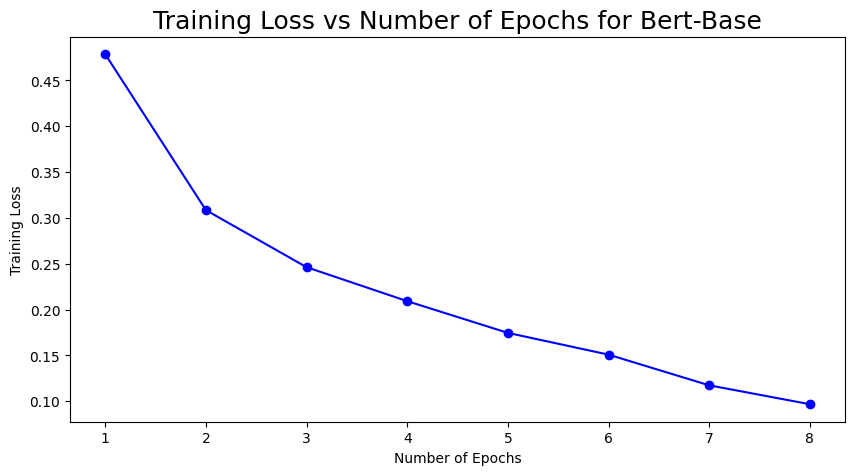

In [64]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for Bert-Base",fontsize=18)

(0.0, 100.0)

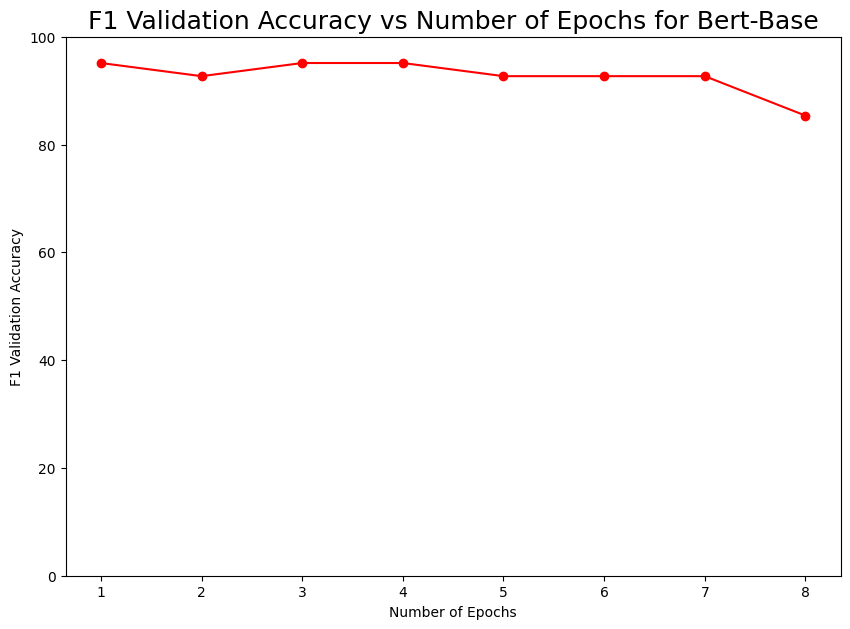

In [65]:
fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

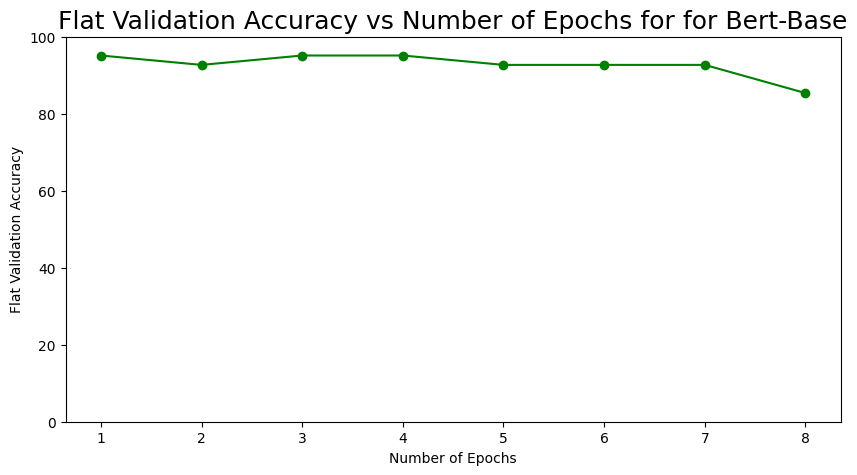

In [66]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [67]:

df_test

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
4327,755,খাটে ঘুমানোর সময় মজা দুই জনই পাইছে,1,1,0,0,0,0,[1]
10478,6795,হুম পৃথিবীতে এখনো ধর্ষন তোর ভারতেই ধর্মবিরো...,1,0,0,0,0,1,[1]
1591,8018,আলহামদুলিল্লাহ আললাহ একমাত্র বাচানের মালিক সুস...,0,0,0,0,0,0,[0]
3164,6381,সেনা চাই পাকিস্তানকে চুদে দেবে,1,0,1,0,0,0,[1]
7238,6111,বাকশালের একাল সেকাল শিরোনামে এপিসোড চাই খালিদ,1,1,0,0,1,0,[1]
...,...,...,...,...,...,...,...,...,...
1198,504,ডাইনি বুবুজান,1,0,1,0,0,0,[1]
3845,2798,কারে চুইদা মাতাল হইছেআরে বোকাচুদি ঢাবির ভিপিরে...,1,1,0,0,0,0,[1]
2205,8931,প্রথম বাংলা সিনেমা গিয়ে ইচ্ছা,0,0,0,0,0,0,[0]
9008,6217,রব্বানী সময়ে সারা বি এনপি আওয়ামীলীগ মিলেও পারেনি,1,0,1,1,0,0,[1]


In [68]:
df_test['one_hot_labels'] = list(df_test[mesh_Heading_categories].values)
df_test.head(3)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
4327,755,খাটে ঘুমানোর সময় মজা দুই জনই পাইছে,1,1,0,0,0,0,[1]
10478,6795,হুম পৃথিবীতে এখনো ধর্ষন তোর ভারতেই ধর্মবিরো...,1,0,0,0,0,1,[1]
1591,8018,আলহামদুলিল্লাহ আললাহ একমাত্র বাচানের মালিক সুস...,0,0,0,0,0,0,[0]


In [69]:
test_labels = list(df_test.one_hot_labels.values)
Articles_test = list(df_test.Text.values)
test_mesh_categories = list(df_test.columns[2:3])

In [70]:
# Encoding input data
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)
test_input_ids = test_encodings['input_ids']
test_attention_masks = test_encodings['attention_mask']

In [71]:
# Make tensors out of data
test_inputs = torch.IntTensor(test_input_ids)
test_labels = torch.IntTensor(test_labels)
test_masks = torch.IntTensor(test_attention_masks)
# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels,)# test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

<a id="9"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Model-2 Evaluating the model</p>
#### [Top ↑](#top) 

In [72]:
%%time

# Test

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

CPU times: user 8.04 s, sys: 12 ms, total: 8.05 s
Wall time: 8.02 s


<a id="10"></a>
## <p style="background-color:#1a0a36;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Model-2  Classification Report</p>
#### [Top ↑](#top)


In [73]:
pred_bools = [pl>0.50 for pl in pred_labels] #boolean output after thresholding
# Print and save classification report
test_mesh_categories=['non-hostile','hostile']
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

df_test_result=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)
df_report=pd.DataFrame(clf_report).transpose()



Test F1 Accuracy:  0.8842504743833017
Test Flat Accuracy:  0.8842504743833017 

              precision    recall  f1-score   support

 non-hostile       0.76      0.84      0.80       288
     hostile       0.94      0.90      0.92       766

    accuracy                           0.88      1054
   macro avg       0.85      0.87      0.86      1054
weighted avg       0.89      0.88      0.89      1054



In [74]:
print(pred_labels)


[array([0.98669785], dtype=float32), array([0.9515753], dtype=float32), array([0.0133367], dtype=float32), array([0.99520797], dtype=float32), array([0.99260205], dtype=float32), array([0.9926927], dtype=float32), array([0.74342275], dtype=float32), array([0.00723578], dtype=float32), array([0.890559], dtype=float32), array([0.99566627], dtype=float32), array([0.9945897], dtype=float32), array([0.9969067], dtype=float32), array([0.99098116], dtype=float32), array([0.9494906], dtype=float32), array([0.9961648], dtype=float32), array([0.9956383], dtype=float32), array([0.9936626], dtype=float32), array([0.98881346], dtype=float32), array([0.99606377], dtype=float32), array([0.9833629], dtype=float32), array([0.02555542], dtype=float32), array([0.0157862], dtype=float32), array([0.7747104], dtype=float32), array([0.9969662], dtype=float32), array([0.9956131], dtype=float32), array([0.00537855], dtype=float32), array([0.7450413], dtype=float32), array([0.9721004], dtype=float32), array([0.

In [75]:
model2_f1=Test_F1_Accuracy
model2_pred=pred_labels
print(model2_f1)
print(model2_pred)

0.8842504743833017
[array([0.98669785], dtype=float32), array([0.9515753], dtype=float32), array([0.0133367], dtype=float32), array([0.99520797], dtype=float32), array([0.99260205], dtype=float32), array([0.9926927], dtype=float32), array([0.74342275], dtype=float32), array([0.00723578], dtype=float32), array([0.890559], dtype=float32), array([0.99566627], dtype=float32), array([0.9945897], dtype=float32), array([0.9969067], dtype=float32), array([0.99098116], dtype=float32), array([0.9494906], dtype=float32), array([0.9961648], dtype=float32), array([0.9956383], dtype=float32), array([0.9936626], dtype=float32), array([0.98881346], dtype=float32), array([0.99606377], dtype=float32), array([0.9833629], dtype=float32), array([0.02555542], dtype=float32), array([0.0157862], dtype=float32), array([0.7747104], dtype=float32), array([0.9969662], dtype=float32), array([0.9956131], dtype=float32), array([0.00537855], dtype=float32), array([0.7450413], dtype=float32), array([0.9721004], dtype=

**Model-3**

**Model-3 Tokenizations**

In [76]:
%%time
from transformers import AutoTokenizer
max_length = 128
#tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base', do_lower_case=False)  # tokenizer
model_name = 'sagorsarker/bangla-bert-base'
# model_name='distilbert-base-uncased'
# tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True) 
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
# tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False) 

encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
attention_masks = encodings['attention_mask'] # attention masks

tokenizer outputs:  dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
CPU times: user 1.43 s, sys: 33 ms, total: 1.46 s
Wall time: 2.07 s


In [77]:
# Identifying indices of 'one_hot_labels' entries that only occur once - this will allow me to stratify split our training data later
label_counts = df_train.one_hot_labels.astype(str).value_counts()
print(label_counts)
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)
print('df label indices with only one instance: ', one_freq)

[1]    6734
[0]    2747
Name: one_hot_labels, dtype: int64
df label indices with only one instance:  Index([], dtype='object')


In [78]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=2020, test_size=0.20)

# Convert all of our data into torch tensors, the required datatype for our BERT Pytorch model
train_inputs = torch.IntTensor(train_inputs)
train_labels = torch.IntTensor(train_labels)
train_masks = torch.LongTensor(train_masks)

validation_inputs = torch.IntTensor(validation_inputs)
validation_labels = torch.IntTensor(validation_labels)
validation_masks = torch.IntTensor(validation_masks)
print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)

print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)

torch.Size([7584, 128])
torch.Size([7584, 1])
torch.Size([7584, 128])
torch.Size([1897, 128])
torch.Size([1897, 1])
torch.Size([1897, 128])


**Model-3 Creating the Data**

In [79]:
batch_size = 64

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data =     TensorDataset(train_inputs, train_masks, train_labels,)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [80]:
torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

**Model-3 Loading the pretrained model**

In [81]:
%%time
#Tried Several Models Locally XLNet was performing Best. Note If you are changing the model then change the Tokenizer also
# model = RobertaForSequenceClassification.from_pretrained('distilroberta-base', num_labels=num_labels)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
# model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=num_labels)
model.cuda()
print('Model Pushed to Cuda for Training')

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Model Pushed to Cuda for Training
CPU times: user 2.46 s, sys: 1.38 s, total: 3.85 s
Wall time: 13 s


In [82]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [83]:
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)
# optimizer = AdamW(model.parameters(),lr=4e-5)  # Default optimization #XL-NET

In [84]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

**Model-3 Training the model**

In [85]:
wandb.init(project='project_name', entity='fstamim9')
# For Storing our loss and accuracy for plotting
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

# Number of training epochs (Orignal author's recommend between 10 and 20)
epochs = 8

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch "):
    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Tracking variables
    tr_loss = 0 #running loss
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels= batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()

        # Forward pass for multilabel classification
        # https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
        # Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities
        # Also This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable 
        # than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the 
        # log-sum-exp trick for numerical stability.
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss() 
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    

        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # scheduler.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)

    ###############################################################################

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Variables to gather full output
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

    # Predict
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            # Forward pass
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

    # Flatten outputs
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate Accuracy
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    
    wandb.log({"train_loss":tr_loss/nb_tr_steps,"val_f1_accuracy":val_f1_accuracy,"val_flat_accuracy":val_flat_accuracy,})
wandb.finish()

Epoch :   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.3711511496485782


Epoch :  12%|█▎        | 1/8 [02:50<19:51, 170.23s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.22631088337477515


Epoch :  25%|██▌       | 2/8 [05:40<16:59, 169.99s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.1659601646311143


Epoch :  38%|███▊      | 3/8 [08:29<14:09, 169.89s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.12168656856197269


Epoch :  50%|█████     | 4/8 [11:19<11:19, 169.78s/it]

F1 Validation Accuracy:  97.5609756097561
Flat Validation Accuracy:  97.5609756097561


Train loss: 0.08877975440451077


Epoch :  62%|██████▎   | 5/8 [14:09<08:29, 169.72s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.05906425520167256


Epoch :  75%|███████▌  | 6/8 [16:58<05:39, 169.69s/it]

F1 Validation Accuracy:  97.5609756097561
Flat Validation Accuracy:  97.5609756097561


Train loss: 0.04348761020541316


Epoch :  88%|████████▊ | 7/8 [19:48<02:49, 169.58s/it]

F1 Validation Accuracy:  95.1219512195122
Flat Validation Accuracy:  95.1219512195122


Train loss: 0.028551295051398147


Epoch : 100%|██████████| 8/8 [22:37<00:00, 169.67s/it]

F1 Validation Accuracy:  95.1219512195122
Flat Validation Accuracy:  95.1219512195122




train_loss,█▅▄▃▂▂▁▁
val_f1_accuracy,▁▁▁█▁█▄▄
val_flat_accuracy,▁▁▁█▁█▄▄
train_loss,0.02855
val_f1_accuracy,95.12195
val_flat_accuracy,95.12195


In [86]:
num_epochs = np.arange(1,len(training_loss_list)+1)
df_train_results=pd.DataFrame({'Epochs':num_epochs,'F1 Validation Accuracy':val_f1_accuracy_list,\
                               'Flat Validation Accuracy':val_flat_accuracy_list,'Train loss':training_loss_list})

**Model-3 Visualizing The results**

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for Bert-Base')

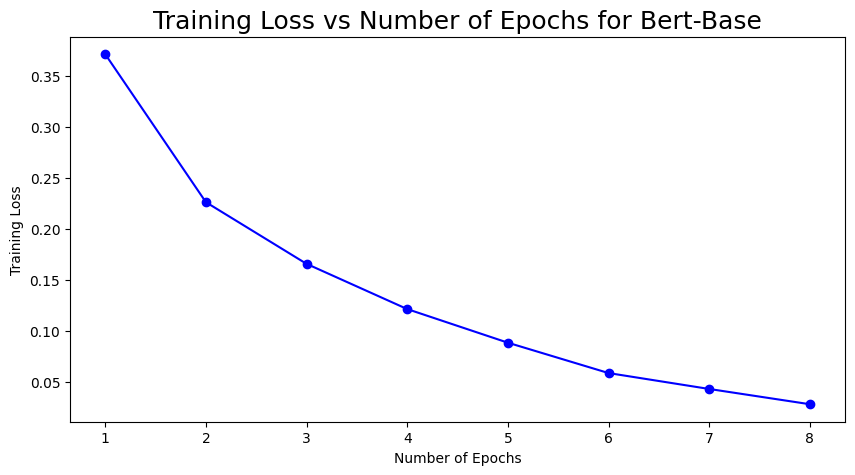

In [87]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for Bert-Base",fontsize=18)

(0.0, 100.0)

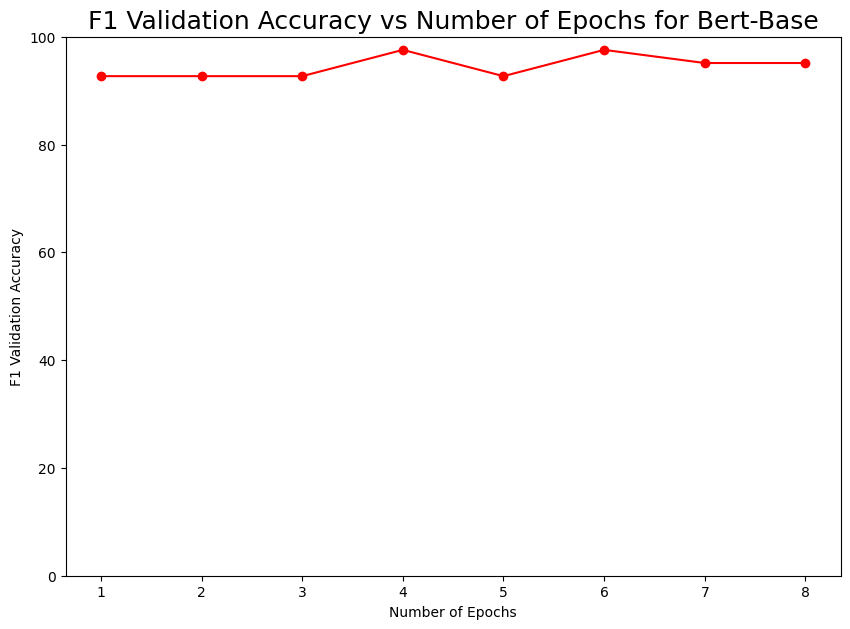

In [88]:
fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

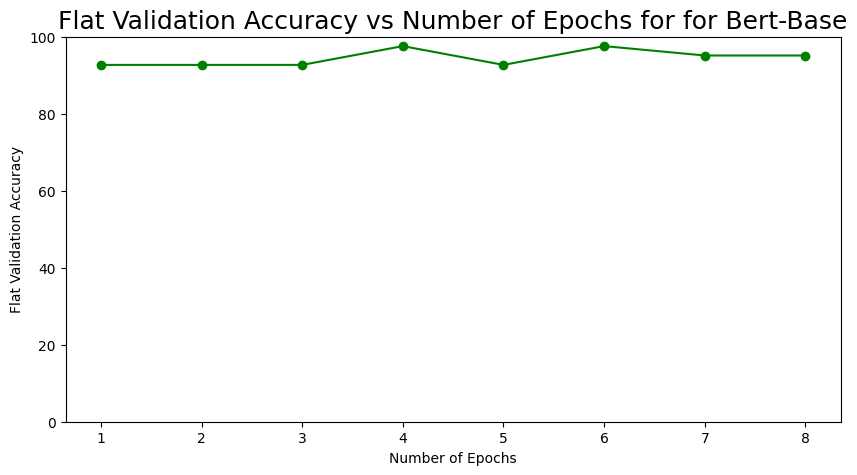

In [89]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [90]:
df_test['one_hot_labels'] = list(df_test[mesh_Heading_categories].values)
df_test.head(3)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
4327,755,খাটে ঘুমানোর সময় মজা দুই জনই পাইছে,1,1,0,0,0,0,[1]
10478,6795,হুম পৃথিবীতে এখনো ধর্ষন তোর ভারতেই ধর্মবিরো...,1,0,0,0,0,1,[1]
1591,8018,আলহামদুলিল্লাহ আললাহ একমাত্র বাচানের মালিক সুস...,0,0,0,0,0,0,[0]


In [91]:
test_labels = list(df_test.one_hot_labels.values)
Articles_test = list(df_test.Text.values)
test_mesh_categories = list(df_test.columns[2:3])

In [92]:
# Encoding input data
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)
test_input_ids = test_encodings['input_ids']
test_attention_masks = test_encodings['attention_mask']

In [93]:
# Make tensors out of data
test_inputs = torch.IntTensor(test_input_ids)
test_labels = torch.IntTensor(test_labels)
test_masks = torch.IntTensor(test_attention_masks)
# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels,)# test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

**Model-3 Evaluating the model**

In [94]:

%%time

# Test

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

CPU times: user 7.94 s, sys: 16.9 ms, total: 7.95 s
Wall time: 8.01 s


**Model-3 Classification Report**

In [95]:
pred_bools = [pl>0.50 for pl in pred_labels] #boolean output after thresholding
# Print and save classification report
test_mesh_categories=['non-hostile','hostile']
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

df_test_result=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)
df_report=pd.DataFrame(clf_report).transpose()

Test F1 Accuracy:  0.8975332068311196
Test Flat Accuracy:  0.8975332068311196 

              precision    recall  f1-score   support

 non-hostile       0.78      0.86      0.82       288
     hostile       0.95      0.91      0.93       766

    accuracy                           0.90      1054
   macro avg       0.87      0.89      0.87      1054
weighted avg       0.90      0.90      0.90      1054



In [96]:
model3_f1=Test_F1_Accuracy
model3_pred=pred_labels

In [97]:
print(model3_f1)
print(model3_pred)

0.8975332068311196
[array([0.98509455], dtype=float32), array([0.9983903], dtype=float32), array([0.20146133], dtype=float32), array([0.9987777], dtype=float32), array([0.00278275], dtype=float32), array([0.99879503], dtype=float32), array([0.9985911], dtype=float32), array([0.00111787], dtype=float32), array([0.04389688], dtype=float32), array([0.99921465], dtype=float32), array([0.99856657], dtype=float32), array([0.99926203], dtype=float32), array([0.99921095], dtype=float32), array([0.9502488], dtype=float32), array([0.99893624], dtype=float32), array([0.99926966], dtype=float32), array([0.9983317], dtype=float32), array([0.36663297], dtype=float32), array([0.9991296], dtype=float32), array([0.999161], dtype=float32), array([0.00099974], dtype=float32), array([0.00971798], dtype=float32), array([0.9991289], dtype=float32), array([0.99922335], dtype=float32), array([0.99897987], dtype=float32), array([0.00090981], dtype=float32), array([0.99914837], dtype=float32), array([0.9954123]

**Model-4**

**Model-4 Tokenizations**

In [98]:
%%time
from transformers import AutoTokenizer
max_length = 128
#tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base', do_lower_case=False)  # tokenizer
model_name = 'xlm-roberta-base'
# tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True) 
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
#tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False) 

encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
attention_masks = encodings['attention_mask'] # attention masks


tokenizer outputs:  dict_keys(['input_ids', 'attention_mask'])
CPU times: user 2.22 s, sys: 39 ms, total: 2.26 s
Wall time: 3.22 s


In [99]:
# df_train, df_test = train_test_split(df, random_state=32, test_size=0.20, shuffle=True)

# print(df_train.shape)
# print(df_test.shape)
# df_test

In [100]:
df_train['one_hot_labels'] = list(df_train[mesh_Heading_categories].values)
df_train.head(3)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
5731,5513,মরোশ কেনো খানকি,1,1,1,0,0,0,[1]
4011,4121,কুক,1,1,0,0,0,1,[1]
5920,7872,ভিডিও গুলো দেখি সবচেয়ে অন্যতম সুন্দর ভিডিও ভাল...,0,0,0,0,0,0,[0]


In [101]:
# Identifying indices of 'one_hot_labels' entries that only occur once - this will allow me to stratify split our training data later
label_counts = df_train.one_hot_labels.astype(str).value_counts()
print(label_counts)
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)
print('df label indices with only one instance: ', one_freq)

[1]    6734
[0]    2747
Name: one_hot_labels, dtype: int64
df label indices with only one instance:  Index([], dtype='object')


In [102]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=2020, test_size=0.20)

# Convert all of our data into torch tensors, the required datatype for our BERT Pytorch model
train_inputs = torch.IntTensor(train_inputs)
train_labels = torch.IntTensor(train_labels)
train_masks = torch.LongTensor(train_masks)

validation_inputs = torch.IntTensor(validation_inputs)
validation_labels = torch.IntTensor(validation_labels)
validation_masks = torch.IntTensor(validation_masks)
print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)

print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)

torch.Size([7584, 128])
torch.Size([7584, 1])
torch.Size([7584, 128])
torch.Size([1897, 128])
torch.Size([1897, 1])
torch.Size([1897, 128])


**Model-4 Creating the Data Loaders**

In [103]:
batch_size = 64

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data =     TensorDataset(train_inputs, train_masks, train_labels,)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [104]:
torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

**Model-4 Loading the pretrained model**

In [105]:
%%time
#Tried Several Models Locally XLNet was performing Best. Note If you are changing the model then change the Tokenizer also
# model = RobertaForSequenceClassification.from_pretrained('model_name', num_labels=num_labels)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
# model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=num_labels)
model.cuda()
print('Model Pushed to Cuda for Training')

You are using a model of type xlm-roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing BertForSequenceClassification: ['roberta.encoder.layer.0.attention.self.query.weight', 'roberta.pooler.dense.bias', 'roberta.encoder.layer.8.attention.self.value.weight', 'roberta.encoder.layer.0.intermediate.dense.weight', 'roberta.encoder.layer.6.output.dense.weight', 'roberta.encoder.layer.7.output.LayerNorm.bias', 'lm_head.layer_norm.weight', 'roberta.encoder.layer.5.attention.output.LayerNorm.bias', 'roberta.encoder.layer.7.attention.output.dense.weight', 'roberta.encoder.layer.1.attention.self.key.weight', 'roberta.encoder.layer.9.attention.self.query.weight', 'roberta.encoder.layer.7.attention.self.query.weight', 'roberta.encoder.layer.5.attention.self.query.bias', 'roberta.encoder.layer.11.attention.self.query.bias', 'roberta.encoder.layer.8.attention.self.key.bias', 'roberta.encoder.layer.11.intermediate.dense.bias', 'roberta.embeddings.word_embeddings.weight', 'roberta.encoder.layer.10.at

Model Pushed to Cuda for Training
CPU times: user 7.14 s, sys: 2.93 s, total: 10.1 s
Wall time: 25.5 s


In [106]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [107]:
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)
# optimizer = AdamW(model.parameters(),lr=4e-5)  # Default optimization #XL-NET

In [108]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

**Model-4 Training the model**

In [109]:
wandb.init(project='project_name', entity='fstamim9')
# For Storing our loss and accuracy for plotting
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

# Number of training epochs (Orignal author's recommend between 10 and 20)
epochs = 8

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch "):
    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Tracking variables
    tr_loss = 0 #running loss
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels= batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()

        # Forward pass for multilabel classification
        # https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
        # Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities
        # Also This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable 
        # than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the 
        # log-sum-exp trick for numerical stability.
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss() 
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    

        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # scheduler.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)

    ###############################################################################

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Variables to gather full output
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

    # Predict
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            # Forward pass
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

    # Flatten outputs
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate Accuracy
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    
    wandb.log({"train_loss":tr_loss/nb_tr_steps,"val_f1_accuracy":val_f1_accuracy,"val_flat_accuracy":val_flat_accuracy,})
wandb.finish()

Epoch :   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.5855800118766913


Epoch :  12%|█▎        | 1/8 [02:56<20:35, 176.53s/it]

F1 Validation Accuracy:  70.73170731707317
Flat Validation Accuracy:  70.73170731707317


Train loss: 0.3926497700334597


Epoch :  25%|██▌       | 2/8 [05:52<17:35, 175.98s/it]

F1 Validation Accuracy:  100.0
Flat Validation Accuracy:  100.0


Train loss: 0.30452092555390686


Epoch :  38%|███▊      | 3/8 [08:47<14:39, 175.81s/it]

F1 Validation Accuracy:  90.2439024390244
Flat Validation Accuracy:  90.2439024390244


Train loss: 0.26710076166802094


Epoch :  50%|█████     | 4/8 [11:43<11:43, 175.95s/it]

F1 Validation Accuracy:  100.0
Flat Validation Accuracy:  100.0


Train loss: 0.24486120414583623


Epoch :  62%|██████▎   | 5/8 [14:40<08:48, 176.01s/it]

F1 Validation Accuracy:  100.0
Flat Validation Accuracy:  100.0


Train loss: 0.22578177413269251


Epoch :  75%|███████▌  | 6/8 [17:35<05:51, 175.97s/it]

F1 Validation Accuracy:  100.0
Flat Validation Accuracy:  100.0


Train loss: 0.20501276086859344


Epoch :  88%|████████▊ | 7/8 [20:31<02:55, 175.87s/it]

F1 Validation Accuracy:  100.0
Flat Validation Accuracy:  100.0


Train loss: 0.20354783898141204


Epoch : 100%|██████████| 8/8 [23:27<00:00, 175.95s/it]

F1 Validation Accuracy:  100.0
Flat Validation Accuracy:  100.0




train_loss,█▄▃▂▂▁▁▁
val_f1_accuracy,▁█▆█████
val_flat_accuracy,▁█▆█████
train_loss,0.20355
val_f1_accuracy,100.0
val_flat_accuracy,100.0


In [110]:
num_epochs = np.arange(1,len(training_loss_list)+1)
df_train_results=pd.DataFrame({'Epochs':num_epochs,'F1 Validation Accuracy':val_f1_accuracy_list,\
                               'Flat Validation Accuracy':val_flat_accuracy_list,'Train loss':training_loss_list})

**Model-4 Visualizing The results**

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for Bert-Base')

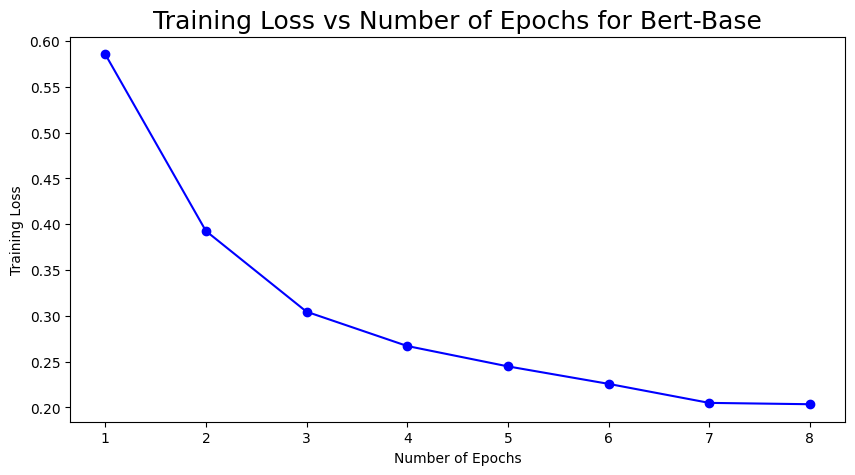

In [111]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for Bert-Base",fontsize=18)

(0.0, 100.0)

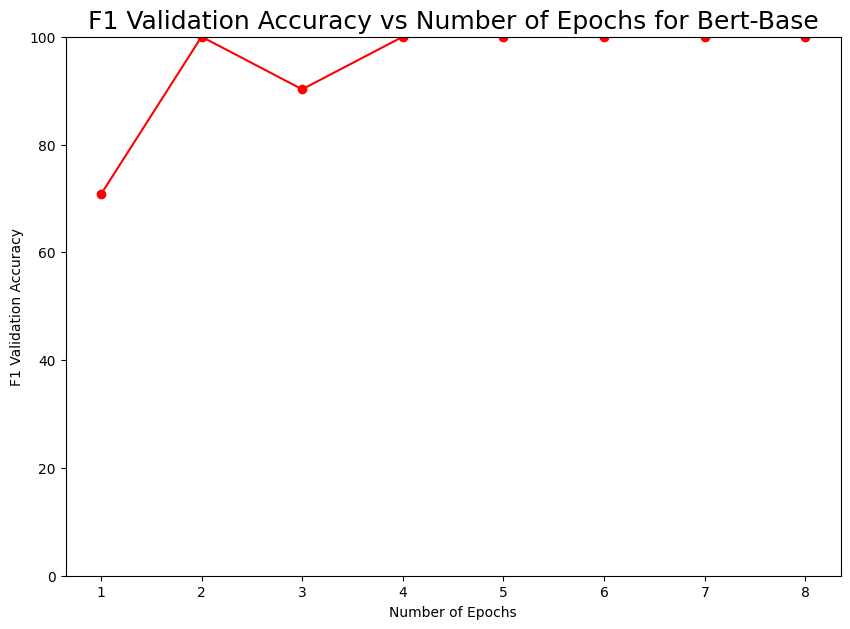

In [112]:
fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

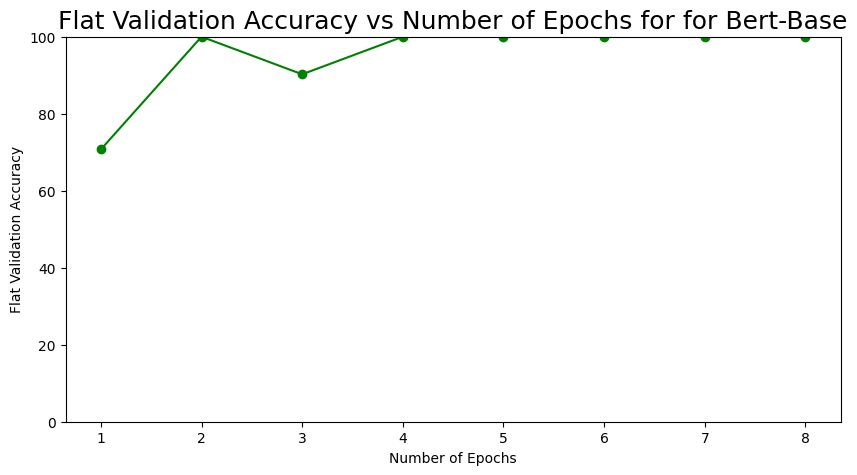

In [113]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [114]:
# df_train, df_test = train_test_split(df, random_state=32, test_size=0.20, shuffle=True)

# print(df_train.shape)
# print(df_test.shape)
# df_test

In [115]:
# df_test['one_hot_labels'] = list(df_test[mesh_Heading_categories].values)
# df_test.head(3)

In [116]:
test_labels = list(df_test.one_hot_labels.values)
Articles_test = list(df_test.Text.values)
test_mesh_categories = list(df_test.columns[2:3])

In [117]:
# Encoding input data
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)
test_input_ids = test_encodings['input_ids']
test_attention_masks = test_encodings['attention_mask']

In [118]:
# Make tensors out of data
test_inputs = torch.IntTensor(test_input_ids)
test_labels = torch.IntTensor(test_labels)
test_masks = torch.IntTensor(test_attention_masks)
# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels,)# test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

**Model-4 Evaluating the model**

In [119]:
%%time

# Test

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

CPU times: user 8.05 s, sys: 11 ms, total: 8.06 s
Wall time: 8.03 s


**Model-4 Classification Report**

In [120]:
pred_bools = [pl>0.50 for pl in pred_labels] #boolean output after thresholding
# Print and save classification report
test_mesh_categories=['non-hostile','hostile']
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

df_test_result=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)
df_report=pd.DataFrame(clf_report).transpose()


Test F1 Accuracy:  0.9079696394686907
Test Flat Accuracy:  0.9079696394686907 

              precision    recall  f1-score   support

 non-hostile       0.87      0.78      0.82       288
     hostile       0.92      0.96      0.94       766

    accuracy                           0.91      1054
   macro avg       0.90      0.87      0.88      1054
weighted avg       0.91      0.91      0.91      1054



In [121]:
model4_f1=Test_F1_Accuracy
model4_pred=pred_labels
print(model4_f1)
print(type(model4_pred))

0.9079696394686907
<class 'list'>


**Model 5**

**Model 5 tokenizar**

In [122]:
%%time
from transformers import AutoTokenizer
max_length = 128
#tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base', do_lower_case=False)  # tokenizer
model_name = 'csebuetnlp/banglabert'
# tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True) 
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
#tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=False) 

encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) # tokenizer's encoding method
print('tokenizer outputs: ', encodings.keys())

input_ids = encodings['input_ids'] # tokenized and encoded sentences
attention_masks = encodings['attention_mask'] # attention masks

tokenizer outputs:  dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
CPU times: user 1.52 s, sys: 20.9 ms, total: 1.54 s
Wall time: 1.93 s


In [123]:
df_train['one_hot_labels'] = list(df_train[mesh_Heading_categories].values)
df_train.head(3)

,id,Text,Hostile/Non-Hostile,offensive,Hate speech,threat,defamation,sarcasm,one_hot_labels
5731,5513,মরোশ কেনো খানকি,1,1,1,0,0,0,[1]
4011,4121,কুক,1,1,0,0,0,1,[1]
5920,7872,ভিডিও গুলো দেখি সবচেয়ে অন্যতম সুন্দর ভিডিও ভাল...,0,0,0,0,0,0,[0]


In [124]:
# Identifying indices of 'one_hot_labels' entries that only occur once - this will allow me to stratify split our training data later
label_counts = df_train.one_hot_labels.astype(str).value_counts()
print(label_counts)
one_freq = label_counts[label_counts==1].keys()
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)
print('df label indices with only one instance: ', one_freq)

[1]    6734
[0]    2747
Name: one_hot_labels, dtype: int64
df label indices with only one instance:  Index([], dtype='object')


In [125]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=2020, test_size=0.20)

# Convert all of our data into torch tensors, the required datatype for our BERT Pytorch model
train_inputs = torch.IntTensor(train_inputs)
train_labels = torch.IntTensor(train_labels)
train_masks = torch.LongTensor(train_masks)

validation_inputs = torch.IntTensor(validation_inputs)
validation_labels = torch.IntTensor(validation_labels)
validation_masks = torch.IntTensor(validation_masks)
print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)

print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)

torch.Size([7584, 128])
torch.Size([7584, 1])
torch.Size([7584, 128])
torch.Size([1897, 128])
torch.Size([1897, 1])
torch.Size([1897, 128])


**Model-5 Creating the Data Loaders**

In [126]:
batch_size = 64

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data =     TensorDataset(train_inputs, train_masks, train_labels,)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [127]:
torch.save(validation_dataloader,'validation_data_loader')
torch.save(train_dataloader,'train_data_loader')

In [128]:
%%time
#Tried Several Models Locally XLNet was performing Best. Note If you are changing the model then change the Tokenizer also
# model = RobertaForSequenceClassification.from_pretrained('model_name', num_labels=num_labels)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
# model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=num_labels)
model.cuda()
print('Model Pushed to Cuda for Training')

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing BertForSequenceClassification: ['electra.encoder.layer.7.attention.self.key.bias', 'electra.encoder.layer.2.attention.self.query.bias', 'electra.encoder.layer.6.attention.self.key.weight', 'electra.encoder.layer.6.intermediate.dense.bias', 'electra.encoder.layer.10.attention.output.LayerNorm.weight', 'electra.encoder.layer.6.attention.self.query.bias', 'electra.encoder.layer.4.attention.self.value.bias', 'electra.encoder.layer.10.output.LayerNorm.weight', 'electra.encoder.layer.5.attention.self.key.weight', 'electra.encoder.layer.3.attention.output.dense.weight', 'electra.encoder.layer.0.attention.self.query.weight', 'electra.encoder.layer.10.output.dense.weight', 'discriminator_predictions.dense.weight', 'electra.encoder.layer.4.attention.output.LayerNorm.bias', 'electra.encoder.layer.1.intermediate.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'electra.encoder.layer.7.outpu

Model Pushed to Cuda for Training
CPU times: user 3.12 s, sys: 1.09 s, total: 4.21 s
Wall time: 29.1 s


In [129]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [130]:
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)
# optimizer = AdamW(model.parameters(),lr=4e-5)  # Default optimization #XL-NET

In [131]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'

In [132]:
wandb.init(project='project_name', entity='fstamim9')
# For Storing our loss and accuracy for plotting
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

# Number of training epochs (Orignal author's recommend between 10 and 20)
epochs = 8

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch "):
    # Training

    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Tracking variables
    tr_loss = 0 #running loss
    nb_tr_examples, nb_tr_steps = 0, 0
  
    # Train the data for one epoch
    for step, batch in enumerate(train_dataloader):
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels= batch
        # Clear out the gradients (by default they accumulate)
        optimizer.zero_grad()

        # Forward pass for multilabel classification
        # https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss
        # Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities
        # Also This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable 
        # than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the 
        # log-sum-exp trick for numerical stability.
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss() 
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    

        # Backward pass
        loss.backward()
        # Update parameters and take a step using the computed gradient
        optimizer.step()
        # scheduler.step()
        # Update tracking variables
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)

    ###############################################################################

    # Validation

    # Put model in evaluation mode to evaluate loss on the validation set
    model.eval()

    # Variables to gather full output
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

    # Predict
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            # Forward pass
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

    # Flatten outputs
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calculate Accuracy
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    
    wandb.log({"train_loss":tr_loss/nb_tr_steps,"val_f1_accuracy":val_f1_accuracy,"val_flat_accuracy":val_flat_accuracy,})
wandb.finish()

Epoch :   0%|          | 0/8 [00:00<?, ?it/s]

Train loss: 0.5830207617342973


Epoch :  12%|█▎        | 1/8 [02:47<19:33, 167.64s/it]

F1 Validation Accuracy:  73.17073170731707
Flat Validation Accuracy:  73.17073170731707


Train loss: 0.4152823655294771


Epoch :  25%|██▌       | 2/8 [05:35<16:45, 167.62s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.3025034148903454


Epoch :  38%|███▊      | 3/8 [08:22<13:58, 167.64s/it]

F1 Validation Accuracy:  90.2439024390244
Flat Validation Accuracy:  90.2439024390244


Train loss: 0.24766278836657019


Epoch :  50%|█████     | 4/8 [11:10<11:09, 167.46s/it]

F1 Validation Accuracy:  95.1219512195122
Flat Validation Accuracy:  95.1219512195122


Train loss: 0.22029294377239814


Epoch :  62%|██████▎   | 5/8 [13:57<08:22, 167.46s/it]

F1 Validation Accuracy:  97.5609756097561
Flat Validation Accuracy:  97.5609756097561


Train loss: 0.1748015448576262


Epoch :  75%|███████▌  | 6/8 [16:45<05:34, 167.49s/it]

F1 Validation Accuracy:  92.6829268292683
Flat Validation Accuracy:  92.6829268292683


Train loss: 0.15048204111952743


Epoch :  88%|████████▊ | 7/8 [19:32<02:47, 167.49s/it]

F1 Validation Accuracy:  97.5609756097561
Flat Validation Accuracy:  97.5609756097561


Train loss: 0.13667257299192814


Epoch : 100%|██████████| 8/8 [22:19<00:00, 167.47s/it]

F1 Validation Accuracy:  97.5609756097561
Flat Validation Accuracy:  97.5609756097561




train_loss,█▅▄▃▂▂▁▁
val_f1_accuracy,▁▇▆▇█▇██
val_flat_accuracy,▁▇▆▇█▇██
train_loss,0.13667
val_f1_accuracy,97.56098
val_flat_accuracy,97.56098


In [133]:
num_epochs = np.arange(1,len(training_loss_list)+1)
df_train_results=pd.DataFrame({'Epochs':num_epochs,'F1 Validation Accuracy':val_f1_accuracy_list,\
                               'Flat Validation Accuracy':val_flat_accuracy_list,'Train loss':training_loss_list})

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for Bert-Base')

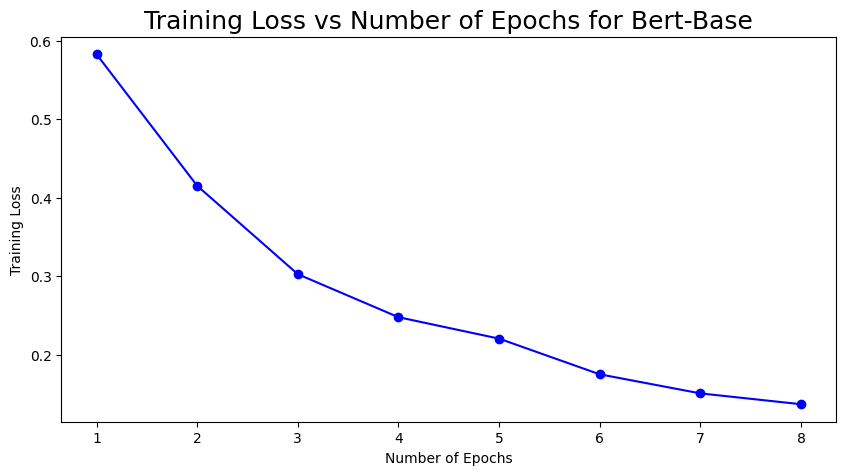

In [134]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for Bert-Base",fontsize=18)

(0.0, 100.0)

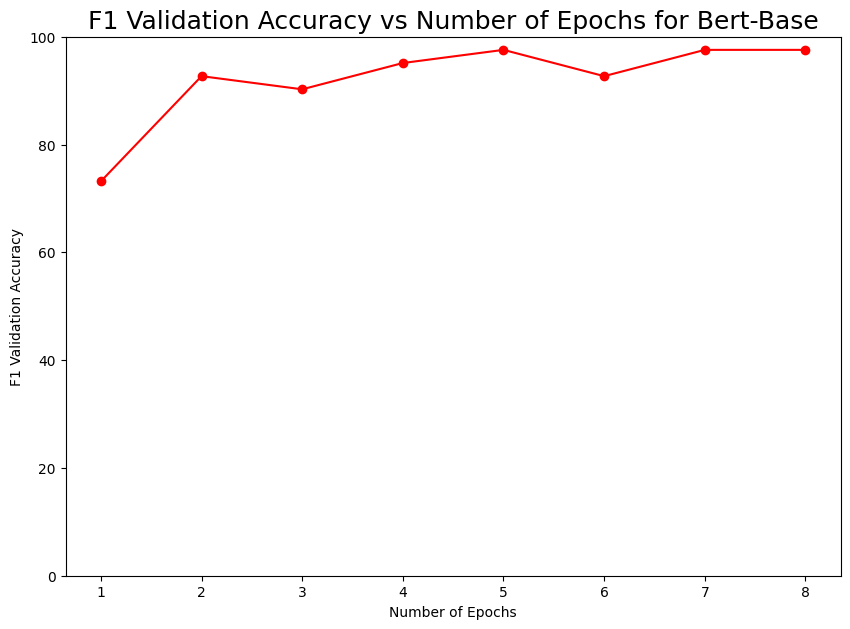

In [135]:
fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

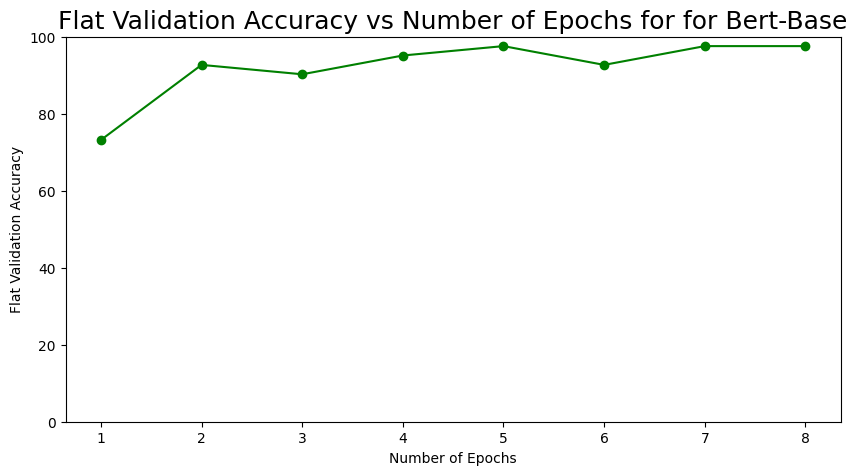

In [136]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [137]:
test_labels = list(df_test.one_hot_labels.values)
Articles_test = list(df_test.Text.values)
test_mesh_categories = list(df_test.columns[2:3])

In [138]:
# Encoding input data
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)
test_input_ids = test_encodings['input_ids']
test_attention_masks = test_encodings['attention_mask']

In [139]:
# Make tensors out of data
test_inputs = torch.IntTensor(test_input_ids)
test_labels = torch.IntTensor(test_labels)
test_masks = torch.IntTensor(test_attention_masks)
# Create test dataloader
test_data = TensorDataset(test_inputs, test_masks, test_labels,)# test_token_types)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
# Save test dataloader
torch.save(test_dataloader,'test_data_loader')

In [140]:
%%time

# Test

# Put model in evaluation mode to evaluate loss on the validation set
model.eval()

#track variables
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

# Predict
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        # Forward pass
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

# Flatten outputs
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
pred_labels = [item for sublist in pred_labels for item in sublist]
true_labels = [item for sublist in true_labels for item in sublist]
# Converting flattened binary values to boolean values
true_bools = [tl==1 for tl in true_labels]

CPU times: user 7.95 s, sys: 16.9 ms, total: 7.97 s
Wall time: 8.05 s


In [141]:
pred_bools = [pl>0.50 for pl in pred_labels] #boolean output after thresholding
# Print and save classification report
test_mesh_categories=['non-hostile','hostile']
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

df_test_result=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)
df_report=pd.DataFrame(clf_report).transpose()


Test F1 Accuracy:  0.8709677419354839
Test Flat Accuracy:  0.8709677419354839 

              precision    recall  f1-score   support

 non-hostile       0.78      0.74      0.76       288
     hostile       0.90      0.92      0.91       766

    accuracy                           0.87      1054
   macro avg       0.84      0.83      0.84      1054
weighted avg       0.87      0.87      0.87      1054



In [142]:
model5_f1=Test_F1_Accuracy
model5_pred=pred_labels
print(model5_f1)
print(type(model5_pred))

0.8709677419354839
<class 'list'>


**Ensemble of Trnasformer**

**weighted Ensemble**

In [143]:
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities and F1 scores for each model
preds_list = [np.array(model1_pred), np.array(model2_pred),np.array( model3_pred),np.array( model4_pred),np.array( model5_pred)] # list of numpy arrays containing predicted probabilities for each model
f1_scores =[model1_f1, model2_f1, model3_f1,model4_f1,model5_f1] # list of F1 scores for each model
# Compute the weights for each model based on their F1 scores
weights = [f1 / sum(f1_scores) for f1 in f1_scores]
# print(weights)
total_f1_score = sum(f1_scores)

print(total_f1_score)

weighted_pred_probs = np.average(preds_list, axis=0, weights=weights)

# Convert the weighted predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(weighted_pred_probs)>.5


# Compute the F1 score of the weighted ensemble
weighted_f1_score = f1_score(true_bools,pred_bools, average='micro')

print('Weighted F1 score:', weighted_f1_score)
print(f1_scores)

4.402277039848197
Weighted F1 score: 0.9165085388994307
[0.8415559772296015, 0.8842504743833017, 0.8975332068311196, 0.9079696394686907, 0.8709677419354839]


In [144]:


from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))


              precision    recall  f1-score   support

 non-hostile       0.88      0.81      0.84       288
     hostile       0.93      0.96      0.94       766

    accuracy                           0.92      1054
   macro avg       0.90      0.88      0.89      1054
weighted avg       0.92      0.92      0.92      1054



In [145]:
from sklearn.metrics import confusion_matrix
true_bools = np.array(true_bools)
# Assuming you have already defined `pred_y` and `y_test`
conf_matrix = confusion_matrix(true_bools, pred_bools)

# Print the confusion matrix
print(conf_matrix)

[[233  55]
 [ 33 733]]


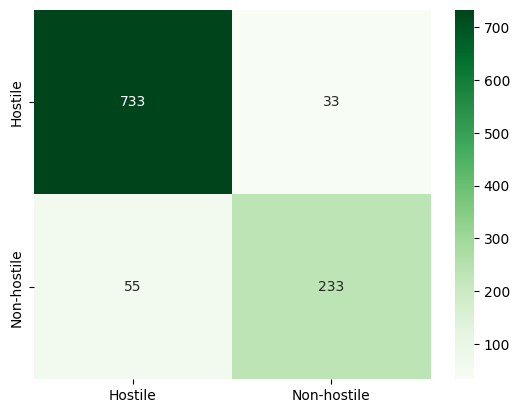

In [146]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined `pred_y` and `y_test`
# conf_matrix = confusion_matrix(true_bools, pred_bools)

# Create heatmap
# sns.heatmap(conf_matrix, annot=True, cmap="Blues")
# sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='d')
# tick_labels = ['Hostile', 'Non-hostile'] 


# # Add labels and title
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.title("Confusion Matrix")

# # Show the plot
# plt.show()
# Define tick labels
# tick_labels = ['Hostile', 'Non-hostile']  # Replace with your own labels

# # Set tick labels for the x-axis
# plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# # Set tick labels for the y-axis
# plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

# # Show the plot
# plt.show()

# Swap the rows and columns
new_conf_matrix = np.array([[conf_matrix[1][1], conf_matrix[1][0]], [conf_matrix[0][1], conf_matrix[0][0]]])

# Create heatmap
sns.heatmap(new_conf_matrix, annot=True, cmap="Greens", fmt='d')

# Define tick labels
tick_labels = ['Hostile', 'Non-hostile']  # Swap the order of the labels

# Set tick labels for the x-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# Set tick labels for the y-axis
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

# Show the plot
plt.show()


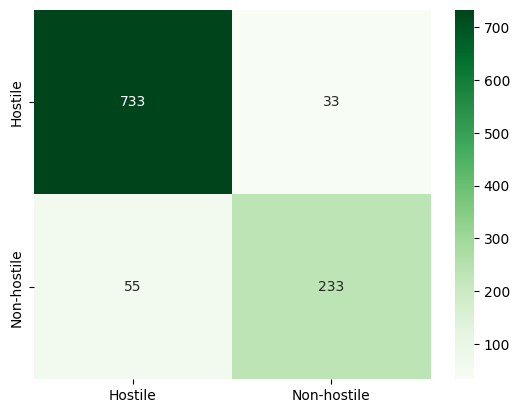

In [147]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined `pred_y` and `y_test`
conf_matrix = confusion_matrix(true_bools, pred_bools)


# Swap the rows and columns
new_conf_matrix = np.array([[conf_matrix[1][1], conf_matrix[1][0]], [conf_matrix[0][1], conf_matrix[0][0]]])

# Create heatmap
sns.heatmap(new_conf_matrix, annot=True, cmap="Greens", fmt='d')

# Define tick labels
tick_labels = ['Hostile', 'Non-hostile']  # Swap the order of the labels

# Set tick labels for the x-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# Set tick labels for the y-axis
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

# Show the plot
plt.show()


In [148]:
print(type(true_bools))

<class 'numpy.ndarray'>


In [149]:
#mbert,banglabert,xlmr
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities and F1 scores for each model
preds_list = [ np.array(model2_pred),np.array( model3_pred),np.array( model4_pred)] # list of numpy arrays containing predicted probabilities for each model
f1_scores =[ model2_f1, model3_f1,model4_f1] # list of F1 scores for each model
# Compute the weights for each model based on their F1 scores
weights = [f1 / sum(f1_scores) for f1 in f1_scores]
# print(weights)
total_f1_score = sum(f1_scores)

print(total_f1_score)

weighted_pred_probs = np.average(preds_list, axis=0, weights=weights)

# Convert the weighted predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(weighted_pred_probs)>.5


# Compute the F1 score of the weighted ensemble
weighted_f1_score = f1_score(true_bools,pred_bools, average='micro')

print('Weighted F1 score:', weighted_f1_score)
print(f1_scores)



from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

2.6897533206831117
Weighted F1 score: 0.9193548387096774
[0.8842504743833017, 0.8975332068311196, 0.9079696394686907]
              precision    recall  f1-score   support

 non-hostile       0.86      0.84      0.85       288
     hostile       0.94      0.95      0.94       766

    accuracy                           0.92      1054
   macro avg       0.90      0.89      0.90      1054
weighted avg       0.92      0.92      0.92      1054



In [150]:
#banglabert,xlmr
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities and F1 scores for each model
preds_list = [ np.array( model3_pred),np.array( model4_pred)] # list of numpy arrays containing predicted probabilities for each model
f1_scores =[  model3_f1,model4_f1] # list of F1 scores for each model
# Compute the weights for each model based on their F1 scores
weights = [f1 / sum(f1_scores) for f1 in f1_scores]
# print(weights)
total_f1_score = sum(f1_scores)

print(total_f1_score)

weighted_pred_probs = np.average(preds_list, axis=0, weights=weights)

# Convert the weighted predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(weighted_pred_probs)>.5


# Compute the F1 score of the weighted ensemble
weighted_f1_score = f1_score(true_bools,pred_bools, average='micro')

print('Weighted F1 score:', weighted_f1_score)
print(f1_scores)



from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

1.8055028462998104
Weighted F1 score: 0.922201138519924
[0.8975332068311196, 0.9079696394686907]
              precision    recall  f1-score   support

 non-hostile       0.86      0.85      0.86       288
     hostile       0.94      0.95      0.95       766

    accuracy                           0.92      1054
   macro avg       0.90      0.90      0.90      1054
weighted avg       0.92      0.92      0.92      1054



In [151]:
#mbert,banglabert
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities and F1 scores for each model
preds_list = [ np.array(model2_pred),np.array( model3_pred)] # list of numpy arrays containing predicted probabilities for each model
f1_scores =[ model2_f1, model3_f1] # list of F1 scores for each model
# Compute the weights for each model based on their F1 scores
weights = [f1 / sum(f1_scores) for f1 in f1_scores]
# print(weights)
total_f1_score = sum(f1_scores)

print(total_f1_score)

weighted_pred_probs = np.average(preds_list, axis=0, weights=weights)

# Convert the weighted predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(weighted_pred_probs)>.3


# Compute the F1 score of the weighted ensemble
weighted_f1_score = f1_score(true_bools,pred_bools, average='micro')

print('Weighted F1 score:', weighted_f1_score)
print(f1_scores)



from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

1.7817836812144212
Weighted F1 score: 0.9079696394686907
[0.8842504743833017, 0.8975332068311196]
              precision    recall  f1-score   support

 non-hostile       0.87      0.78      0.82       288
     hostile       0.92      0.96      0.94       766

    accuracy                           0.91      1054
   macro avg       0.89      0.87      0.88      1054
weighted avg       0.91      0.91      0.91      1054



In [152]:
#distilbert,mbert,banglabert
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities and F1 scores for each model
preds_list = [np.array(model1_pred), np.array(model2_pred),np.array( model3_pred)] # list of numpy arrays containing predicted probabilities for each model
f1_scores =[  model1_f1,model2_f1, model3_f1] # list of F1 scores for each model
# Compute the weights for each model based on their F1 scores
weights = [f1 / sum(f1_scores) for f1 in f1_scores]
# print(weights)
total_f1_score = sum(f1_scores)

print(total_f1_score)

weighted_pred_probs = np.average(preds_list, axis=0, weights=weights)

# Convert the weighted predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(weighted_pred_probs)>.3


# Compute the F1 score of the weighted ensemble
weighted_f1_score = f1_score(true_bools,pred_bools, average='micro')

print('Weighted F1 score:', weighted_f1_score)
print(f1_scores)



from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

2.623339658444023
Weighted F1 score: 0.9003795066413662
[0.8415559772296015, 0.8842504743833017, 0.8975332068311196]
              precision    recall  f1-score   support

 non-hostile       0.90      0.71      0.80       288
     hostile       0.90      0.97      0.93       766

    accuracy                           0.90      1054
   macro avg       0.90      0.84      0.87      1054
weighted avg       0.90      0.90      0.90      1054



In [162]:
import itertools
import numpy as np
from sklearn.metrics import f1_score, classification_report

def ensemble_predictions(preds_list, f1_scores, threshold=0.5):
    """
    Generate all possible combinations of model predictions and calculate the
    weighted ensemble predictions and F1 score for each combination.
    
    Args:
        preds_list (list of numpy arrays): List of predicted probabilities for each model.
        f1_scores (list of floats): List of F1 scores for each model.
        threshold (float): Threshold value for binary classification.
    
    Returns:
        A dictionary containing the weighted ensemble predictions and F1 score for
        each combination of model predictions.
    """
    n_models = len(preds_list)
    model_combinations = []
    for i in range(1, n_models+1):
        combinations = itertools.combinations(range(n_models), i)
        model_combinations += [list(c) for c in combinations]
    
    ensemble_results = {}
    for combination in model_combinations:
        combination_preds = [preds_list[i] for i in combination]
        combination_f1_scores = [f1_scores[i] for i in combination]
        weights = [f1 / sum(combination_f1_scores) for f1 in combination_f1_scores]
        weighted_pred_probs = np.average(combination_preds, axis=0, weights=weights)
        pred_bools = weighted_pred_probs > threshold
        weighted_f1_score = f1_score(true_bools, pred_bools, average='binary')
        ensemble_results[str(combination)] = {'pred_bools': pred_bools,
                                               'weighted_f1_score': weighted_f1_score}
    return ensemble_results

# Define the predicted probabilities and F1 scores for each model
preds_list = [np.array(model1_pred), np.array(model2_pred), np.array(model3_pred),
              np.array(model4_pred), np.array(model5_pred)]  # list of numpy arrays containing predicted probabilities for each model
f1_scores = [model1_f1, model2_f1, model3_f1, model4_f1, model5_f1]  # list of F1 scores for each model

# Convert true labels into binary format
true_bools = np.array(true_labels) > 0.3

# Generate all possible ensemble predictions and their F1 scores
ensemble_reports = ensemble_predictions(preds_list, f1_scores)

# Print the weighted F1 score and classification report for each ensemble
test_mesh_categories = ['non-hostile', 'hostile']
for ensemble_name, report in ensemble_reports.items():
    print(f'{ensemble_name} - Weighted F1 score: {report["weighted_f1_score"]:.4f}')
    print(classification_report(true_bools, report['pred_bools'], target_names=test_mesh_categories, labels=[0, 1],digits=4))


[0] - Weighted F1 score: 0.8923
              precision    recall  f1-score   support

 non-hostile     0.7249    0.6771    0.7002       288
     hostile     0.8815    0.9034    0.8923       766

    accuracy                         0.8416      1054
   macro avg     0.8032    0.7902    0.7963      1054
weighted avg     0.8387    0.8416    0.8398      1054

[1] - Weighted F1 score: 0.9187
              precision    recall  f1-score   support

 non-hostile     0.7594    0.8438    0.7993       288
     hostile     0.9387    0.8995    0.9187       766

    accuracy                         0.8843      1054
   macro avg     0.8490    0.8716    0.8590      1054
weighted avg     0.8897    0.8843    0.8861      1054

[2] - Weighted F1 score: 0.9282
              precision    recall  f1-score   support

 non-hostile     0.7848    0.8611    0.8212       288
     hostile     0.9458    0.9112    0.9282       766

    accuracy                         0.8975      1054
   macro avg     0.8653    0.886

**A Ensemble**

In [153]:
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities for each model
preds_list = [np.array(model1_pred), np.array(model2_pred),np.array( model3_pred),np.array( model4_pred),np.array( model5_pred)] # list of numpy arrays containing predicted probabilities for each model

# Compute the average of the predicted probabilities
avg_pred_probs = np.mean(preds_list, axis=0)

# Convert the averaged predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(avg_pred_probs)>.5

# Compute the F1 score of the average ensemble
avg_f1_score = f1_score(true_bools, pred_bools, average='micro')

print('Average F1 score:', avg_f1_score)

Average F1 score: 0.9165085388994307


In [154]:
from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']
# # Convert true labels into binary format
# true_bools = np.array(true_labels) > 0.5

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

              precision    recall  f1-score   support

 non-hostile       0.88      0.81      0.84       288
     hostile       0.93      0.96      0.94       766

    accuracy                           0.92      1054
   macro avg       0.90      0.88      0.89      1054
weighted avg       0.92      0.92      0.92      1054



In [155]:
from sklearn.metrics import confusion_matrix
true_bools = np.array(true_bools)
# Assuming you have already defined `pred_y` and `y_test`
conf_matrix = confusion_matrix(true_bools, pred_bools)

# Print the confusion matrix
print(conf_matrix)

[[233  55]
 [ 33 733]]


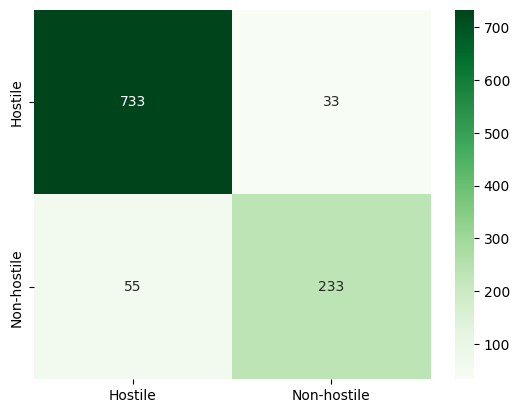

In [156]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined `pred_y` and `y_test`
# conf_matrix = confusion_matrix(true_bools, pred_bools)

# Create heatmap
# sns.heatmap(conf_matrix, annot=True, cmap="Blues")
# sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt='d')
# tick_labels = ['Hostile', 'Non-hostile'] 


# # Add labels and title
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.title("Confusion Matrix")

# # Show the plot
# plt.show()
# Define tick labels
# tick_labels = ['Hostile', 'Non-hostile']  # Replace with your own labels

# # Set tick labels for the x-axis
# plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# # Set tick labels for the y-axis
# plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

# # Show the plot
# plt.show()

# Swap the rows and columns
new_conf_matrix = np.array([[conf_matrix[1][1], conf_matrix[1][0]], [conf_matrix[0][1], conf_matrix[0][0]]])

# Create heatmap
sns.heatmap(new_conf_matrix, annot=True, cmap="Greens", fmt='d')

# Define tick labels
tick_labels = ['Hostile', 'Non-hostile']  # Swap the order of the labels

# Set tick labels for the x-axis
plt.xticks(ticks=[0.5, 1.5], labels=tick_labels)

# Set tick labels for the y-axis
plt.yticks(ticks=[0.5, 1.5], labels=tick_labels)

# Show the plot
plt.show()


In [157]:
#mbart,banglabert,xlmr
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities for each model
preds_list = [np.array(model2_pred),np.array( model3_pred),np.array( model4_pred)] # list of numpy arrays containing predicted probabilities for each model

# Compute the average of the predicted probabilities
avg_pred_probs = np.mean(preds_list, axis=0)

# Convert the averaged predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(avg_pred_probs)>.5

# Compute the F1 score of the average ensemble
avg_f1_score = f1_score(true_bools, pred_bools, average='micro')

print('Average F1 score:', avg_f1_score)

from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']
# # Convert true labels into binary format
# true_bools = np.array(true_labels) > 0.5

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

Average F1 score: 0.9184060721062619
              precision    recall  f1-score   support

 non-hostile       0.86      0.84      0.85       288
     hostile       0.94      0.95      0.94       766

    accuracy                           0.92      1054
   macro avg       0.90      0.89      0.90      1054
weighted avg       0.92      0.92      0.92      1054



In [158]:
#distilbert,mbart,banglabert
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities for each model
preds_list = [np.array(model1_pred), np.array(model2_pred),np.array( model3_pred)] # list of numpy arrays containing predicted probabilities for each model

# Compute the average of the predicted probabilities
avg_pred_probs = np.mean(preds_list, axis=0)

# Convert the averaged predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(avg_pred_probs)>.5

# Compute the F1 score of the average ensemble
avg_f1_score = f1_score(true_bools, pred_bools, average='micro')

print('Average F1 score:', avg_f1_score)

from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']
# # Convert true labels into binary format
# true_bools = np.array(true_labels) > 0.5

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

Average F1 score: 0.9108159392789373
              precision    recall  f1-score   support

 non-hostile       0.83      0.84      0.84       288
     hostile       0.94      0.94      0.94       766

    accuracy                           0.91      1054
   macro avg       0.89      0.89      0.89      1054
weighted avg       0.91      0.91      0.91      1054



In [159]:
#mbart,banglabert
import numpy as np
from sklearn.metrics import f1_score

# Define the predicted probabilities for each model
preds_list = [ np.array(model2_pred),np.array( model3_pred)] # list of numpy arrays containing predicted probabilities for each model

# Compute the average of the predicted probabilities
avg_pred_probs = np.mean(preds_list, axis=0)

# Convert the averaged predicted probabilities into binary predictions using a threshold of 0.5
pred_bools = np.array(avg_pred_probs)>.5

# Compute the F1 score of the average ensemble
avg_f1_score = f1_score(true_bools, pred_bools, average='micro')

print('Average F1 score:', avg_f1_score)

from sklearn.metrics import classification_report
test_mesh_categories=['non-hostile','hostile']
# # Convert true labels into binary format
# true_bools = np.array(true_labels) > 0.5

# Generate classification report for weighted ensemble predictions
print(classification_report(true_bools, pred_bools, target_names=test_mesh_categories))

Average F1 score: 0.9127134724857685
              precision    recall  f1-score   support

 non-hostile       0.82      0.87      0.85       288
     hostile       0.95      0.93      0.94       766

    accuracy                           0.91      1054
   macro avg       0.89      0.90      0.89      1054
weighted avg       0.91      0.91      0.91      1054



In [160]:
import itertools
import numpy as np
from sklearn.metrics import classification_report, f1_score

# Define the predicted probabilities for each model
preds_list = [np.array(model1_pred), np.array(model2_pred), np.array(model3_pred), np.array(model4_pred),np.array(model5_pred)]

# Convert true labels into binary format
true_bools = np.array(true_labels) > 0.3

# Generate all possible combinations of model predictions and compute the average ensemble predictions and F1 score
n_models = len(preds_list)
ensemble_results = {}
for i in range(1, n_models+1):
    combinations = itertools.combinations(range(n_models), i)
    for combination in combinations:
        combination_preds = [preds_list[j] for j in combination]
        avg_pred_probs = np.mean(combination_preds, axis=0)
        pred_bools = np.array(avg_pred_probs) > 0.3
        weighted_f1_score = f1_score(true_bools, pred_bools, average='micro')
        ensemble_results[str(combination)] = {'pred_bools': pred_bools,
                                               'weighted_f1_score': weighted_f1_score}

# Print the weighted F1 score and classification report for each ensemble
test_mesh_categories = ['non-hostile', 'hostile']
for ensemble_name, report in ensemble_results.items():
    print(f'{ensemble_name} - Weighted F1 score: {report["weighted_f1_score"]:.4f}')
    print(classification_report(true_bools, report['pred_bools'], target_names=test_mesh_categories, digits=4))


(0,) - Weighted F1 score: 0.8387
              precision    recall  f1-score   support

 non-hostile     0.7658    0.5903    0.6667       288
     hostile     0.8582    0.9321    0.8936       766

    accuracy                         0.8387      1054
   macro avg     0.8120    0.7612    0.7801      1054
weighted avg     0.8329    0.8387    0.8316      1054

(1,) - Weighted F1 score: 0.8947
              precision    recall  f1-score   support

 non-hostile     0.7960    0.8264    0.8109       288
     hostile     0.9338    0.9204    0.9270       766

    accuracy                         0.8947      1054
   macro avg     0.8649    0.8734    0.8690      1054
weighted avg     0.8961    0.8947    0.8953      1054

(2,) - Weighted F1 score: 0.8966
              precision    recall  f1-score   support

 non-hostile     0.7915    0.8438    0.8168       288
     hostile     0.9398    0.9164    0.9280       766

    accuracy                         0.8966      1054
   macro avg     0.8656    0.